In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

In [14]:
df = pd.read_csv('new_data.csv')
df.head()

,Unnamed: 0,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,review_sentiment,variety
0,0,@kerinokeefe,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,36.781224,Sicily & Sardinia,Etna,NaN,Nicosia,0.13,White Blend
1,1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Quinta dos Avidagos,0.22,Portuguese Red
2,2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Rainstorm,0.02,Pinot Gris
3,3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,St. Julian,0.17,Riesling
4,4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,0.31,Pinot Noir


In [15]:
df = df.drop(['Unnamed: 0','user_name'],axis=1)

In [16]:
df.head() 

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,review_sentiment,variety
0,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,36.781224,Sicily & Sardinia,Etna,NaN,Nicosia,0.13,White Blend
1,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Quinta dos Avidagos,0.22,Portuguese Red
2,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Rainstorm,0.02,Pinot Gris
3,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,St. Julian,0.17,Riesling
4,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,0.31,Pinot Noir


In [17]:
top_varieties = df['variety'].value_counts().head(5)
print("Most frequent variety:")
print(top_varieties)

Most frequent variety:
Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Name: variety, dtype: int64


### Action1 :  Concenterate on the above wines more

In [20]:
least_varieties = df['variety'].value_counts()[-5:]
print("least frequent variety:")
print(least_varieties)

least frequent variety:
Portuguese White              1159
Bordeaux-style White Blend    1066
Pinot Grigio                  1052
Gamay                         1025
Gewürztraminer                1012
Name: variety, dtype: int64


### Action2:  Either remove these or find ways to improve them

In [23]:
top_varieties = df['country'].value_counts()
print("Most market:")
print(top_varieties[:5])
print("Least market:")
print(top_varieties[-5:])

Most market:
US          48153
France      19932
Italy       11370
Portugal     4038
Chile        3630
Name: country, dtype: int64
Least market:
Czech Republic    5
Switzerland       5
India             2
Slovakia          1
Armenia           1
Name: country, dtype: int64


### Action3: Concentrate distributions to "Most Market Countries", and reduce stock sent to "Least Market" Countries.

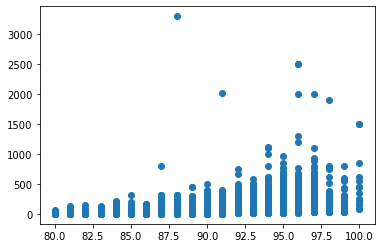

In [31]:
plt.scatter(df['points'],df['price'])

### Action4: As seen the data is negatively skewed ( which is what makes sense), hence the general trend is the better the price is, the better the ratings are. Hence the company should strive for better ratings.


In [39]:
winery_ratings = df.groupby('winery')['points'].mean()
top_wineries = winery_ratings.sort_values(ascending=False).head(5)
bottom_wineries = winery_ratings.sort_values(ascending=True).head(5)
print('Best Winery')
print(top_wineries)

print('Worse Winery')
print(bottom_wineries)



Best Winery
winery
Araujo        98.0
Gandona       97.0
J.L. Chave    97.0
Ovid          97.0
Salon         96.8
Name: points, dtype: float64
Worse Winery
winery
Campo Marin              80.0
Hermes                   80.0
Reyter                   80.0
Highland Hills Winery    80.0
Flock by Smoking Loon    80.0
Name: points, dtype: float64


In [35]:
winery_ratings_sent = df.groupby('variety')['review_sentiment'].mean()
top_wineries_sent = winery_ratings_sent.sort_values(ascending=False).head(5)
bottom_wineries_sent = winery_ratings_sent.sort_values(ascending=True).head(5)
print('Best wines')
print(top_wineries_sent)

print('Worse wines')
print(bottom_wineries_sent)

Best wines
variety
Portuguese White              0.275116
Bordeaux-style White Blend    0.246764
Gewürztraminer                0.239575
Champagne Blend               0.230043
Pinot Gris                    0.213780
Name: review_sentiment, dtype: float64
Worse wines
variety
Nebbiolo       0.087646
Sangiovese     0.090222
Tempranillo    0.098569
Red Blend      0.102686
Malbec         0.103578
Name: review_sentiment, dtype: float64


### Action5: Based on the reviews and sentiment, get rid of negatively reveiewed wines, and instead focus on increasing sales of the highly reviewed ones. Even the wineries most negatively reviwed/points should be revamped.

# preprocessing

In [36]:
df.head()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,review_sentiment,variety
0,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,36.781224,Sicily & Sardinia,Etna,NaN,Nicosia,0.13,White Blend
1,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Quinta dos Avidagos,0.22,Portuguese Red
2,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Rainstorm,0.02,Pinot Gris
3,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,St. Julian,0.17,Riesling
4,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,0.31,Pinot Noir


In [48]:
df.drop(['review_title','region_1','region_2'],axis =1,inplace=True)

In [44]:
print(len(df['winery'].unique()))
print(len(df['country'].unique()))
print(len(df['designation'].unique()))
print(len(df['province'].unique()))

14728
41
30310
371


In [51]:
# df.drop(['winery','designation','province'],axis =1,inplace=True)
df.drop(['review_description'],axis =1,inplace=True)


In [52]:
df.head()

,country,points,price,review_sentiment,variety
0,Italy,87,36.781224,0.13,White Blend
1,Portugal,87,15.000000,0.22,Portuguese Red
2,US,87,14.000000,0.02,Pinot Gris
3,US,87,13.000000,0.17,Riesling
4,US,87,65.000000,0.31,Pinot Noir


In [74]:
top_varieties = df['country'].value_counts( ascending=True)
maps = dict(top_varieties).items()
maps = list(maps)
maps.sort(key = lambda x:x[1])
country_map = {}
for i in range(len(maps)):
    country_map[maps[i][0]] = i
print(country_map)
    

{'Armenia': 0, 'Slovakia': 1, 'India': 2, 'Switzerland': 3, 'Luxembourg': 4, 'Czech Republic': 5, 'Serbia': 6, 'Macedonia': 7, 'Cyprus': 8, 'Ukraine': 9, 'Peru': 10, 'Croatia': 11, 'Georgia': 12, 'Morocco': 13, 'Lebanon': 14, 'Brazil': 15, 'Turkey': 16, 'Uruguay': 17, 'Moldova': 18, 'Hungary': 19, 'Mexico': 20, 'Slovenia': 21, 'England': 22, 'Romania': 23, 'Bulgaria': 24, 'Greece': 25, 'Canada': 26, 'Israel': 27, 'South Africa': 28, 'Australia': 29, 'New Zealand': 30, 'Germany': 31, 'Austria': 32, 'Argentina': 33, 'Spain': 34, 'Chile': 35, 'Portugal': 36, 'Italy': 37, 'France': 38, 'US': 39}


In [80]:
df.replace({'country':country_map},inplace=True)

In [81]:
df.head()

,country,points,price,review_sentiment,variety
0,37.0,87,36.781224,0.13,White Blend
1,36.0,87,15.000000,0.22,Portuguese Red
2,39.0,87,14.000000,0.02,Pinot Gris
3,39.0,87,13.000000,0.17,Riesling
4,39.0,87,65.000000,0.31,Pinot Noir


In [83]:
df.to_csv('Pre_Processed.csv')

In [86]:
filename = 'county_map.txt'
filehandler = open(filename, 'wt')
data = str(country_map)
filehandler.write(data)

598

In [87]:
print(data)

{'Armenia': 0, 'Slovakia': 1, 'India': 2, 'Switzerland': 3, 'Luxembourg': 4, 'Czech Republic': 5, 'Serbia': 6, 'Macedonia': 7, 'Cyprus': 8, 'Ukraine': 9, 'Peru': 10, 'Croatia': 11, 'Georgia': 12, 'Morocco': 13, 'Lebanon': 14, 'Brazil': 15, 'Turkey': 16, 'Uruguay': 17, 'Moldova': 18, 'Hungary': 19, 'Mexico': 20, 'Slovenia': 21, 'England': 22, 'Romania': 23, 'Bulgaria': 24, 'Greece': 25, 'Canada': 26, 'Israel': 27, 'South Africa': 28, 'Australia': 29, 'New Zealand': 30, 'Germany': 31, 'Austria': 32, 'Argentina': 33, 'Spain': 34, 'Chile': 35, 'Portugal': 36, 'Italy': 37, 'France': 38, 'US': 39}


In [94]:
# import pickle
file = open(filename, 'wb') #, encoding='utf-8')
# pickle.dump(country_map, file)
file.write(country_map)
file.close()

TypeError: 'str' object cannot be interpreted as an integer

In [96]:
df.head()


,country,points,price,review_sentiment,variety
0,37.0,87,36.781224,0.13,White Blend
1,36.0,87,15.000000,0.22,Portuguese Red
2,39.0,87,14.000000,0.02,Pinot Gris
3,39.0,87,13.000000,0.17,Riesling
4,39.0,87,65.000000,0.31,Pinot Noir


,country,points,price,review_sentiment
0,37.0,87,36.781224,0.13
